# Import

In [6]:
import matplotlib.pyplot as plt
import torch

import classifier_f_test

get_ipython().magic('matplotlib inline')
get_ipython().magic('reload_ext autoreload')
get_ipython().magic('autoreload 2')

# Create Test Case

In [41]:
test = classifier_f_test.classifierFTest(use_gpu=True)

# Prepare Dataset

In [42]:
test.create_data_loaders()

# Visualize Dataset

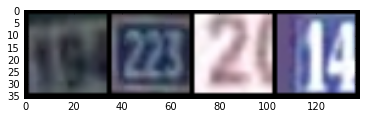

In [9]:
test.visualize_single_batch()

# Create Model

In [43]:
test.create_model()
print(test.model)

AssertionError: 
Found no NVIDIA driver on your system. Please check that you
have an NVIDIA GPU and installed a driver from
http://www.nvidia.com/Download/index.aspx

# Create Loss Function

In [38]:
test.create_loss_function()

# Create Optimizer

In [39]:
test.create_optimizer()

# Train

In [40]:
kwargs = {}
kwargs["visualize_every_n_epoch"] = 10
test.train_model(num_epochs=20, **kwargs)

TypeError: FloatClassNLLCriterion_updateOutput received an invalid combination of arguments - got ([32;1mint[0m, [32;1mtorch.FloatTensor[0m, [31;1mtorch.FloatTensor[0m, [32;1mtorch.FloatTensor[0m, [32;1mbool[0m, [32;1mNoneType[0m, [32;1mtorch.FloatTensor[0m, [32;1mint[0m), but expected (int state, torch.FloatTensor input, torch.LongTensor target, torch.FloatTensor output, bool sizeAverage, [torch.FloatTensor weights or None], torch.FloatTensor total_weight, int ignore_index)

# Save Model

## Checkpoint name

In [23]:
checkpoint_name='checkpoint.tar'

## Save model

In [24]:
torch.save(test.log,checkpoint_name)

## Load model

In [25]:
log=torch.load(checkpoint_name)
model=log['best_model']
test.model = model

# Test Model

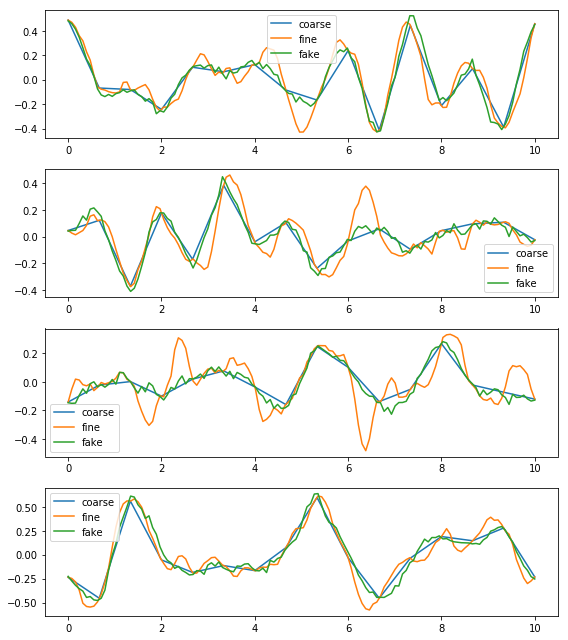

In [26]:
test.test_model()

# Show Loss

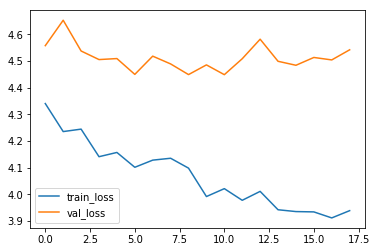

In [27]:
plt.plot(log['train_loss'][2:],label='train_loss')
plt.plot(log['val_loss'][2:],label='val_loss')
plt.legend()
plt.show()